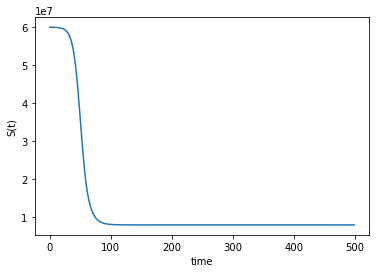

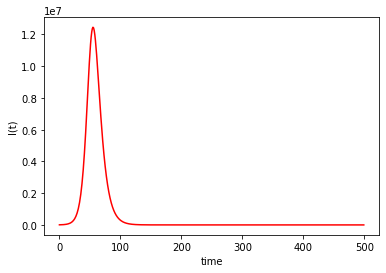

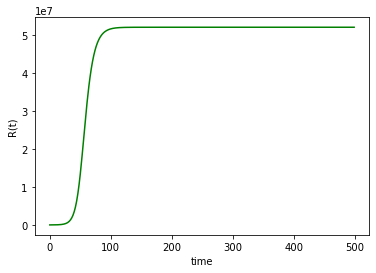

In [73]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

#define constants
beta = 1/7
S0 = 6*10**7
r0 = 3862.32
r1 = 966.54
r2 = 80.35
A = 8.26648
B = 0.221083
C = -0.00430354

#initial conditions
# gamma = beta*S0*r1/(beta*r1+r2)
R0 = np.exp(A)
I0 = B*np.exp(A)/beta
gamma = beta*S0*B/(beta*B+B**2+2*C)
alpha = (beta/gamma)

#Define our derivatives for the SIR model
def f(v,t):
    S, I, R = v;
    return np.array([-alpha*S*I,alpha*S*I-beta*I,beta*I])

# define step size
h = 1;
n_steps = 500;

# define our initial conditions.
time = np.zeros(n_steps);
output = np.zeros((n_steps,3));
output[0] = [S0,I0,R0];

# Write a loop here to perform a forward euler solution. After the loop, plot the results.
n=0
for n in range(n_steps-1):
    time[n+1]=time[n]+h
    output[n+1]=output[n]+h*f(output[n],time[n])

plt.plot(time, output[:,0]);
plt.xlabel('time')
plt.ylabel('S(t)')
plt.show()

plt.plot(time, output[:,1],color='r');
plt.xlabel('time')
plt.ylabel('I(t)')
plt.show()

plt.plot(time, output[:,2],color='g');
plt.xlabel('time')
plt.ylabel('R(t)')
plt.show()

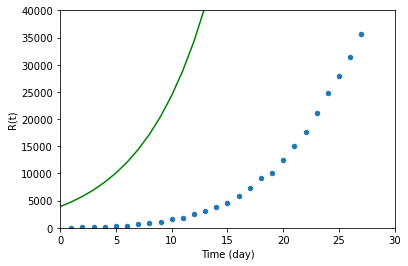

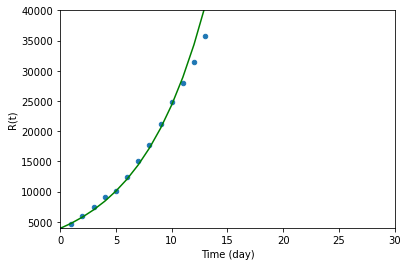

In [74]:
import pandas as pd 

dat = pd.read_csv('Project 2 Infected.csv', header=0)

#plot data on the same plot
ax = dat.plot.scatter(x='Day', y='R(t)', xlabel='Time (day)', ylabel='R(t)')
plt.plot(time, output[:,2], color='g');
plt.xlim([0, 30])
plt.ylim([0, 40000])
plt.show()

dat1 = pd.read_csv('Project 2 Infected Update.csv', header=0)

#plot data on the same plot starting at March 5(which matches are initial condition for R(0))
ax = dat1.plot.scatter(x='Day', y='R(t)', xlabel='Time (day)', ylabel='R(t)')
plt.plot(time, output[:,2], color='g');
plt.xlim([0, 30])
plt.ylim([4000, 40000])
plt.show()

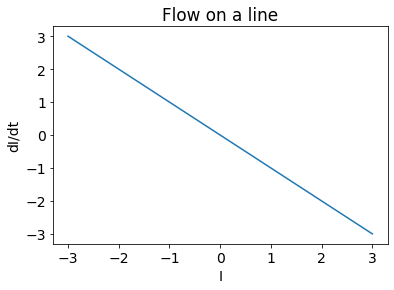

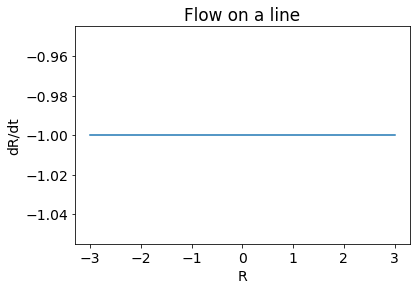

In [104]:
#Bifurcation analysis around beta parameter
#Define our derivatives for the SIR model
def dIdt(I,S,beta):
    dIdt = (beta/(beta*S0*B/(beta*B+B**2+2*C)))*S*I-beta*I
    return dIdt

#Transcritical Bifurcation
I_values = np.linspace(-3,3,100)

dIdt_values = []
for m in I_values:
    dIdt_values.append(dIdt(m,1,1))
    
# Plot derivative vs I
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("I")
plt.ylabel("dI/dt")
plt.title("Flow on a line")
plt.plot(I_values,dIdt_values);
plt.show()

#Bifurcation analysis around beta parameter
#Define our derivatives for the SIR model
def dRdt(I,beta):
    dRdt = beta*I
    return dRdt

#Transcritical Bifurcation
R_values = np.linspace(-3,3,100)

dRdt_values = []
for m in R_values:
    dRdt_values.append(dRdt(1,-1))
    
# Plot derivative vs R
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("R")
plt.ylabel("dR/dt")
plt.title("Flow on a line")
plt.plot(R_values,dRdt_values);
plt.show()

In [ ]:
#sensitivity analysis